In [2]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
from pathlib import Path
from loguru import logger
import warnings

warnings.simplefilter(action="ignore", category=FutureWarning)

load parquetfile from notebook 01.

In [3]:
import tomllib

configfile = Path("../config.toml").resolve()
with configfile.open("rb") as f:
    config = tomllib.load(f)
config

{'raw': 'data/raw',
 'processed': 'data/processed',
 'input': '_chat.txt',
 'current': 'whatsapp-20250923-192055.parq',
 'inputpath': 'whatsapp-20250923-170023.csv',
 'datetime_format': '%d/%m/%Y, %H:%M',
 'drop_authors': []}

In [4]:
root = Path("..").resolve()
processed = root / Path(config["processed"])
datafile = processed / config["current"]
if not datafile.exists():
    logger.warning(
        f"{datafile} does not exist. First run src/preprocess.py, and check the timestamp!"
    )

Show datatypes

In [5]:
df = pd.read_parquet(datafile)
df.dtypes

timestamp    datetime64[ns]
message              object
author               object
has_emoji              bool
dtype: object

In [6]:
df.head()

,timestamp,message,author,has_emoji
0,2017-05-12 17:43:00,12-05-2017 17:43 - Je bent toegevoegd\n,glittering-penguin,False
1,2022-09-16 09:26:00,Wachten op dit bericht\n,eye-catching-wolf,False
2,2022-09-16 07:31:00,Wachten op dit bericht\n,spattered-duck,False
3,2022-09-16 07:41:00,16-09-2022 07:41 - Schjöpschen: Wachten op dit...,riotous-dingo,False
4,2022-09-16 08:21:00,Wachten op dit bericht\n,translucent-dog,False


Count the number of messages

In [7]:
p1 = (
    df[["author", "message"]]
    .groupby("author")
    .count()
    .sort_values("message", ascending=False)
)

k = 15
topk = p1[:k]

In [8]:
topk_authors = list(topk.index)

In [9]:
df["is_topk"] = df["author"].apply(lambda x: x in topk_authors)
df.head()

,timestamp,message,author,has_emoji,is_topk
0,2017-05-12 17:43:00,12-05-2017 17:43 - Je bent toegevoegd\n,glittering-penguin,False,True
1,2022-09-16 09:26:00,Wachten op dit bericht\n,eye-catching-wolf,False,True
2,2022-09-16 07:31:00,Wachten op dit bericht\n,spattered-duck,False,True
3,2022-09-16 07:41:00,16-09-2022 07:41 - Schjöpschen: Wachten op dit...,riotous-dingo,False,True
4,2022-09-16 08:21:00,Wachten op dit bericht\n,translucent-dog,False,True


Text(0.5, 1.0, 'Sending the most messages...')

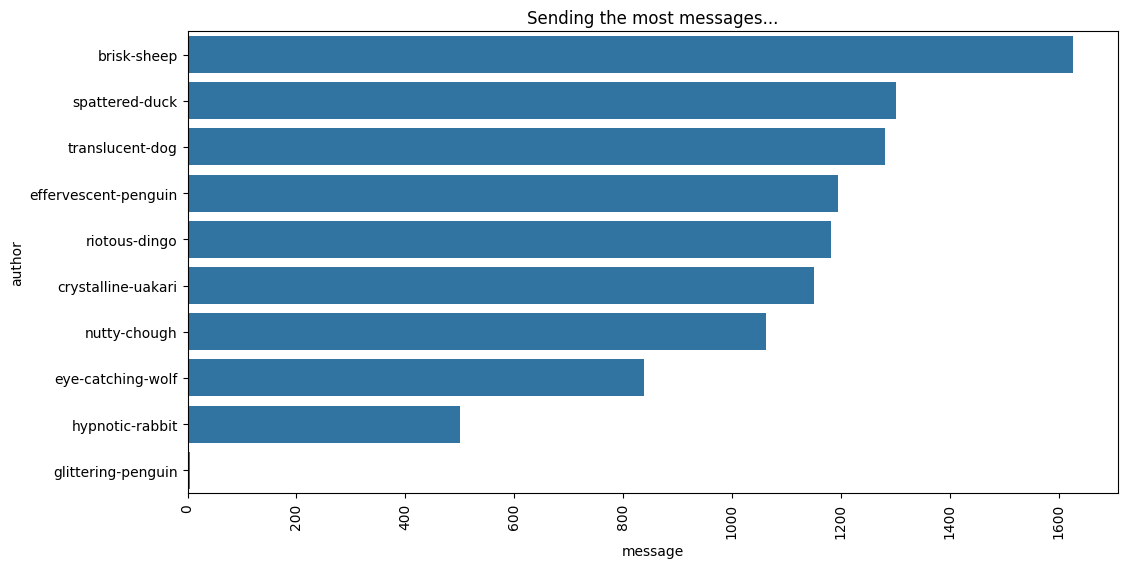

In [10]:
plt.figure(figsize=(12, 6))
sns.barplot(y=p1.index[:k], x="message", data=topk)
plt.xticks(rotation=90)
plt.title("Sending the most messages...")